In [176]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("train.csv")

In [177]:
data=df.values

In [178]:
df.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [179]:
x=data[:,0]
y=data[:,1]
print(x.shape)

(304,)


In [180]:
df1=df.NameOfPokemon.map({'Pikachu':2,'Charmander':1,'Bulbasaur':0})

In [181]:
y=df1.values
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [182]:
from keras.preprocessing import image

In [183]:
img_data=[]
for i in range(x.shape[0]):
    img = image.load_img(x[i],target_size=(32,32))

    img_array = image.img_to_array(img)
     
    img_data.append(img_array)

C:\Users\PARTH\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [184]:
img_data = np.array(img_data,dtype='float32')/255.0


In [185]:
M = img_data.shape[0] 
img_data = img_data.reshape(M,-1)


In [186]:
from sklearn.model_selection import train_test_split
img_data_t,img_data_test,y_t,y_test=train_test_split(img_data,y,test_size=0.2)

In [13]:
img_data.shape

(304, 3072)

In [14]:
y.shape

(304,)

In [56]:
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }   
]
import multiprocessing
cpus = multiprocessing.cpu_count()
print(cpus)

4


In [57]:
from sklearn.model_selection import GridSearchCV


In [67]:
from sklearn import svm
svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
gs.fit(img_data,y)

C:\Users\PARTH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
print(gs.best_estimator_)
print(gs.best_score_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.875


In [66]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
svc.fit(img_data_t,y_t)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
svc.score(img_data_test,y_test)

0.819672131147541

In [70]:
y_pred=svm.predict(img_data)

AttributeError: module 'sklearn.svm' has no attribute 'predict'

In [71]:
y=y.reshape(-1,)

In [72]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [22]:
mySVM  = SVM()


In [23]:
w,b,loss  = mySVM.fit(img_data,y,learning_rate=0.00001,maxItr=1000)


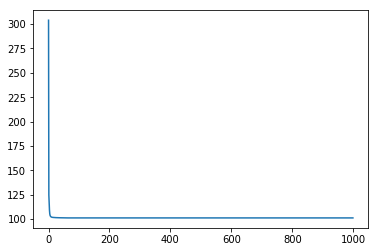

In [24]:
plt.plot(loss)

In [29]:
CLASSES = len(np.unique(y))
print(CLASSES)

3


In [187]:
df2=pd.read_csv("test.csv")

In [188]:
data_x=df2.values

In [189]:
x_t=data_x[:,0]

In [190]:
img_dataxt=[]
for i in range(x_t.shape[0]):
    img = image.load_img(x_t[i],target_size=(32,32))

    img_array = image.img_to_array(img)
     
    img_dataxt.append(img_array)

In [191]:
img_dataxt = np.array(img_dataxt,dtype='float32')/255.0

In [192]:
M = img_dataxt.shape[0] 
img_dataxt = img_dataxt.reshape(M,-1)


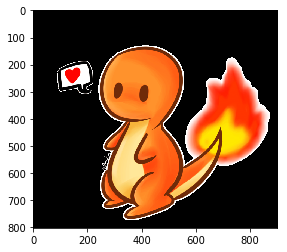

In [194]:
img=cv2.imread(x_t[16])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
r=RandomForestClassifier(n_estimators=300,criterion="entropy")

In [199]:
r.fit(img_data_t,y_t)
r.score(img_data_t,y_t)
r.score(img_data_test,y_test)

0.9344262295081968

In [200]:
z=r.predict(img_dataxt)

In [201]:
dictionary={"ImageId":x_t,"NameOfPokemon":z}

In [202]:
df=pd.DataFrame(pred,columns=["NameOfPokemon"])

In [203]:
mapping={2:'Pikachu',1:'Charmander',0:'Bulbasaur'}

In [204]:
mapping

{2: 'Pikachu', 1: 'Charmander', 0: 'Bulbasaur'}

In [205]:
df=df.NameOfPokemon.map(mapping)

In [206]:
df

0       Bulbasaur
1      Charmander
2       Bulbasaur
3      Charmander
4         Pikachu
5         Pikachu
6         Pikachu
7       Bulbasaur
8       Bulbasaur
9      Charmander
10      Bulbasaur
11      Bulbasaur
12      Bulbasaur
13      Bulbasaur
14     Charmander
15      Bulbasaur
16     Charmander
17     Charmander
18     Charmander
19     Charmander
20        Pikachu
21      Bulbasaur
22     Charmander
23      Bulbasaur
24      Bulbasaur
25     Charmander
26      Bulbasaur
27        Pikachu
28        Pikachu
29        Pikachu
          ...    
93        Pikachu
94        Pikachu
95     Charmander
96        Pikachu
97      Bulbasaur
98        Pikachu
99     Charmander
100     Bulbasaur
101     Bulbasaur
102     Bulbasaur
103       Pikachu
104    Charmander
105       Pikachu
106       Pikachu
107       Pikachu
108    Charmander
109     Bulbasaur
110       Pikachu
111    Charmander
112    Charmander
113    Charmander
114    Charmander
115       Pikachu
116       Pikachu
117       

In [207]:
dictionary={"ImageId":x_t,"NameOfPokemon":df}

In [208]:
data=pd.DataFrame(dictionary)

In [209]:
data.head()


,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu


In [210]:
data.to_csv("Pokemonpred.csv",index=False)